<a href="https://colab.research.google.com/github/ncarolan/COS302/blob/main/HW3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COS302 - HW3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

## Problem 4

### (A)

In [3]:
# Download the example coords dataset from https://www.cs.princeton.edu/courses/archive/fall23/cos302/files/coords.pkl
! wget https://www.cs.princeton.edu/courses/archive/fall23/cos302/files/coords.pkl

--2025-07-17 14:04:27--  https://www.cs.princeton.edu/courses/archive/fall23/cos302/files/coords.pkl
Resolving www.cs.princeton.edu (www.cs.princeton.edu)... 128.112.136.67
Connecting to www.cs.princeton.edu (www.cs.princeton.edu)|128.112.136.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4891 (4.8K)
Saving to: ‘coords.pkl.1’

coords.pkl.1        100%[===================>]   4.78K  --.-KB/s    in 0s      

2025-07-17 14:04:27 (752 MB/s) - ‘coords.pkl.1’ saved [4891/4891]



In [4]:
with open('coords.pkl', 'rb') as f:
  coords = pkl.load(f)

print(f'Coords: {coords.shape} with {coords.dtype}')

Coords: (296, 2) with float64


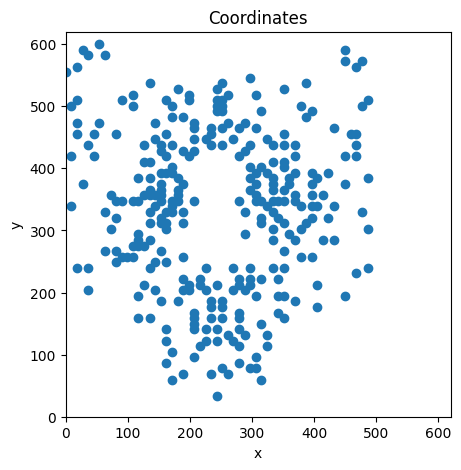

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(coords[:, 0], coords[:, 1]) # There's a hidden tiger if you connect the points using plot!
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coordinates')
ax.set_aspect(1)
ax.set_xlim([0, 620])
ax.set_ylim([0, 620])
plt.show()

### (B)

In [7]:
THETA = np.pi / 2  # 90 degree rotation counterclockwise

SCALE_X = 2 # Double the scale on both axes
SCALE_Y = 2

SHEAR_X = 0.5 # Horizontal shear, y'=y+0.5x
SHEAR_Y = 0

rotate_matrix = np.array([
  [np.cos(THETA), -np.sin(THETA)],
  [np.sin(THETA), np.cos(THETA)]])
scale_matrix = np.array([
  [SCALE_X, 0],
  [0, SCALE_Y]])
shear_matrix = np.array([
  [1, SHEAR_X],
  [SHEAR_Y, 1]])

rotate = coords @ rotate_matrix.T # Remember to transpose the linear maps for numpy multiplication!
scale = coords @ scale_matrix.T
shear = coords @ shear_matrix.T

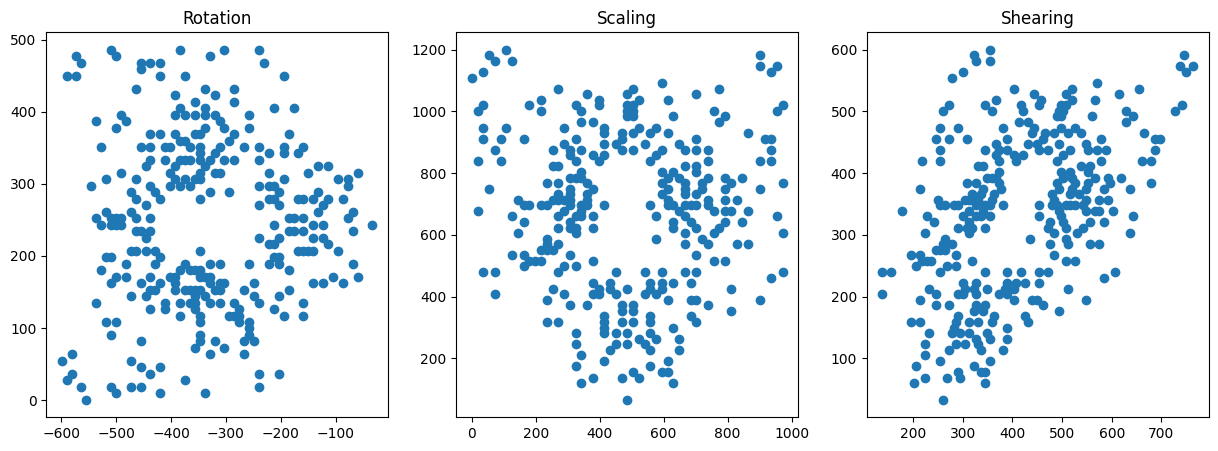

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(rotate[:, 0], rotate[:, 1])
axes[0].set_title('Rotation')
axes[1].scatter(scale[:, 0], scale[:, 1])
axes[1].set_title('Scaling')
axes[2].scatter(shear[:, 0], shear[:, 1])
axes[2].set_title('Shearing')
plt.show()

### (C)

In [9]:
rotate_then_shear = coords @ rotate_matrix.T @ shear_matrix.T
shear_then_rotate = coords @ shear_matrix.T @ rotate_matrix.T

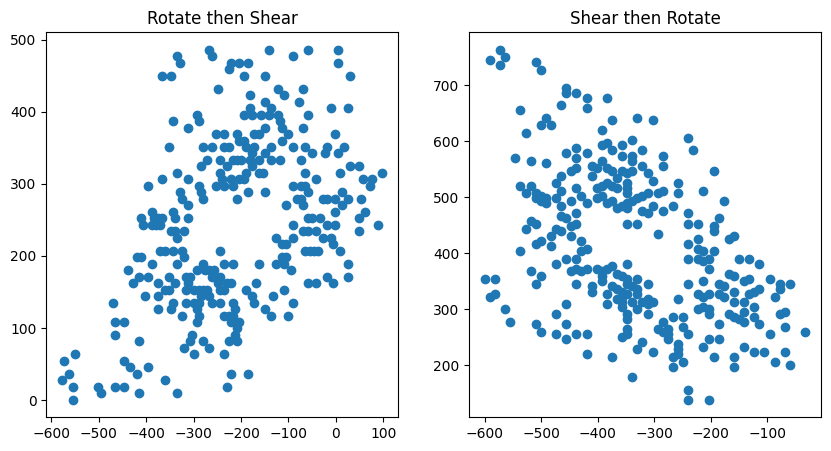

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(rotate_then_shear[:, 0], rotate_then_shear[:, 1])
axes[0].set_title('Rotate then Shear')
axes[1].scatter(shear_then_rotate[:, 0], shear_then_rotate[:, 1])
axes[1].set_title('Shear then Rotate')
plt.show()

These transformations do not commute. This is shown visually above, and is evident because matrix multiplication (the operation underlying linear transformations) does not commute.

## Problem 5

### (A)

In [68]:
# Download a subset of the MNIST dataset from https://www.cs.princeton.edu/courses/archive/fall23/cos302/files/mnist2000.pkl
! wget https://www.cs.princeton.edu/courses/archive/fall23/cos302/files/mnist2000.pkl

--2025-07-17 15:12:29--  https://www.cs.princeton.edu/courses/archive/fall23/cos302/files/mnist2000.pkl
Resolving www.cs.princeton.edu (www.cs.princeton.edu)... 128.112.136.67
Connecting to www.cs.princeton.edu (www.cs.princeton.edu)|128.112.136.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6760007 (6.4M)
Saving to: ‘mnist2000.pkl.1’

mnist2000.pkl.1     100%[===================>]   6.45M  36.2MB/s    in 0.2s    

2025-07-17 15:12:29 (36.2 MB/s) - ‘mnist2000.pkl.1’ saved [6760007/6760007]



In [69]:
with open('mnist2000.pkl', 'rb') as f:
  mnist = pkl.load(f)

print(mnist.keys())
mnist_train_images, mnist_train_labels = mnist['train_images'], mnist['train_labels']
print(f'MNIST Train |  Images: {mnist_train_images.shape} in {mnist_train_images.dtype},  Labels: {mnist_train_labels.shape} in {mnist_train_labels.dtype}')
mnist_test_images, mnist_test_labels = mnist['test_images'], mnist['test_labels']
print(f'MNIST Test  |  Images: {mnist_test_images.shape} in {mnist_test_images.dtype},   Labels: {mnist_test_labels.shape} in {mnist_test_labels.dtype}')

dict_keys(['train_images', 'train_labels', 'test_images', 'test_labels'])
MNIST Train |  Images: (2000, 28, 28) in float32,  Labels: (2000,) in int64
MNIST Test  |  Images: (150, 28, 28) in float32,   Labels: (150,) in int64


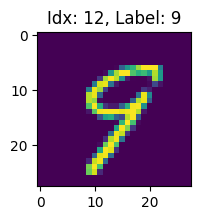

In [70]:
ex_idx = 12 # @param

fig, ax = plt.subplots(figsize=(2, 2))
plt.imshow(mnist_train_images[ex_idx, :, :])
plt.title(f'Idx: {ex_idx}, Label: {mnist_train_labels[ex_idx]}')
plt.show()

### (B)

In [71]:
def classify(test_image: np.ndarray) -> (int, int):
  """
  Classifies an image based on its nearest neighbor.

  Uses Euclidean distance in pixel space to find the nearest neighbor among the
  mnist2000 train set.

  Args:
    test_image: A 28x28 image.

  Returns:
    The integer label of the nearest neighbor.
    The index of the nearest neighbor in the mnist2000 train set.
  """
  sq_digits = (mnist_train_images - test_image) ** 2
  dists = np.sqrt(np.sum(sq_digits, axis=(1, 2)))

  nearest_neighbor_idx = np.argmin(dists)
  nearest_neighbor_label = mnist_train_labels[nearest_neighbor_idx]

  return nearest_neighbor_label, nearest_neighbor_idx

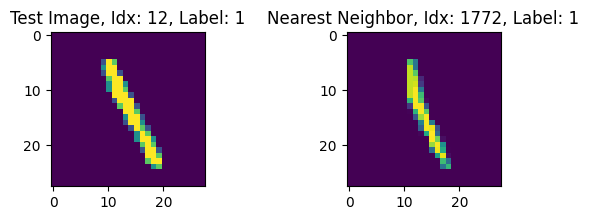

In [72]:
ex_idx = 12 #@param
test_image = mnist_test_images[ex_idx]
neighbor_label, neighbor_idx  = classify(test_image)

fig, ax = plt.subplots(1, 2, figsize=(7, 2))
ax[0].imshow(mnist_test_images[ex_idx, :, :])
ax[0].set_title(f'Test Image, Idx: {ex_idx}, Label: {mnist_test_labels[ex_idx]}')
ax[1].imshow(mnist_train_images[neighbor_idx, :, :])
ax[1].set_title(f'Nearest Neighbor, Idx: {neighbor_idx}, Label: {neighbor_label}')
plt.show()

### (C)

In [73]:
correct = 0
for test_idx in range(len(mnist_test_images)):
  test_image = mnist_test_images[test_idx]
  neighbor_label, neighbor_idx  = classify(test_image)
  if neighbor_label == mnist_test_labels[test_idx]:
    correct += 1

print(f'Test Set Accuracy (with k=1): {correct / len(mnist_test_images):.3f}')

Test Set Accuracy (with k=1): 0.853


### (D)

In [74]:
def knn_classify(test_image: np.ndarray, k: int, debug=False) -> int:
  """
  Classifies an image based on its nearest k neighbors.

  Uses Euclidean distance in pixel space to find the nearest neighbors among the
  mnist2000 train set.

  Args:
    test_image: A 28x28 image.
    k: The number of nearest neighbors to use.

  Returns:
    The most common integer label of the nearest neighbors. If multiple labels
    are tied, returns the smallest label.
  """
  if k > len(mnist_train_images):
    raise ValueError('k must not exceed the number of training images')

  sq_digits = (mnist_train_images - test_image) ** 2
  dists = np.sqrt(np.sum(sq_digits, axis=(1, 2)))

  nearest_neighbor_idxs = np.argsort(dists)[:k]
  nearest_neighbor_labels = mnist_train_labels[nearest_neighbor_idxs]

  ids, counts = np.unique(nearest_neighbor_labels, return_counts=True) # np.unique returns sorted results, resulting in the smallest label in a tie when applying argmax
  if debug:
    print(f'Labels: {ids}')
    print(f'Counts: {counts}')
  max_count = np.argmax(counts)
  label = ids[max_count]

  return label

Labels: [1 3 8 9]
Counts: [6 1 2 1]


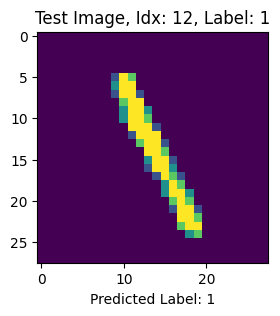

In [77]:
ex_idx = 12 #@param
ex_k = 10 #@param
test_image = mnist_test_images[ex_idx]
neighbor_label = knn_classify(test_image, ex_k, debug=True)

fig, ax = plt.subplots(figsize=(3, 3))
plt.imshow(mnist_test_images[ex_idx, :, :])
plt.title(f'Test Image, Idx: {ex_idx}, Label: {mnist_test_labels[ex_idx]}')
plt.xlabel(f'Predicted Label: {neighbor_label}')
plt.show()

In [78]:
def evaluate_with_k(k: int) -> None:
  """
  Evaluates KNN prediction accuracy for a given k on the mnist2000 test set.

  Args:
    k: The number of nearest neighbors to use.
  """
  correct = 0
  for test_idx in range(len(mnist_test_images)):
    test_image = mnist_test_images[test_idx]
    neighbor_label = knn_classify(test_image=test_image, k=k)
    if neighbor_label == mnist_test_labels[test_idx]:
      correct += 1

  print(f'Test Set Accuracy (with k={k}): {correct / len(mnist_test_images):.3f}')

In [79]:
# Evaluate test set accuracy for k=5, k=10

evaluate_with_k(5)  # timeit: 496 ms ± 93.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
evaluate_with_k(10)  # timeit: 368 ms ± 24.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

Test Set Accuracy (with k=5): 0.853
Test Set Accuracy (with k=10): 0.867


We can vectorize the distance computation in `knn_classify` so that we can  compute results for an entire batch at once. This removes the need to loop over inference when evaluating.

In [80]:
def knn_classify_batch(test_images: np.ndarray, k: int, debug=False) -> int:
  """
  Classifies a batch of images based on their nearest k neighbors.

  Uses Euclidean distance in pixel space to find the nearest neighbors among the
  mnist2000 train set.

  Args:
    test_images: An (Nx28x28) array of images.
    k: The number of nearest neighbors to use.

  Returns:
    A (N,) array of the most common integer label of the nearest neighbors. If
    multiple labels are tied for an image, returns the smallest label.
  """
  if k > len(mnist_train_images):
    raise ValueError('k must not exceed the number of training images')

  sq_digits = (mnist_train_images[None, :, :, :] - test_images[:, None, :, :]) ** 2  # (1, 2000, 28, 28) - (N, 1, 28, 28) for broadcasting -> (N, 2000, 28, 28)
  dists = np.sqrt(np.sum(sq_digits, axis=(2, 3)))  # (N, 2000)

  nearest_neighbor_idxs = np.argsort(dists, axis=1)[:, :k]  # (N, k)
  nearest_neighbor_labels = mnist_train_labels[nearest_neighbor_idxs]  # (N, k)

  def mode(row):
      ids, counts = np.unique(row, return_counts=True)
      return ids[np.argmax(counts)]

  labels = np.apply_along_axis(mode, axis=1, arr=nearest_neighbor_labels) #(N,)
  return labels

In [81]:
def batch_evaluate_with_k(k: int) -> None:
  """
  Evaluates KNN prediction accuracy for a given k on the mnist2000 test set.

  Args:
    k: The number of nearest neighbors to use.
  """
  preds = knn_classify_batch(mnist_test_images, k)
  correct = np.sum(preds == mnist_test_labels)

  print(f'Test Set Accuracy (with k={k}): {correct / len(mnist_test_images):.3f}')

In [82]:
# Evaluate test set accuracy for k=5, k=10

batch_evaluate_with_k(5)  # timeit: 800 ms ± 117 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
batch_evaluate_with_k(10)  # timeit: 734 ms ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

# This vectorized impl is actually slower, probably because of significant memory allocation requirements.

Test Set Accuracy (with k=5): 0.853
Test Set Accuracy (with k=10): 0.867
